# List of Exercises 1 - Exercise 2

*Student: Luigi Lucas de Carvalho Silva / luigi.lcsilva@gmail.com*

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import scipy.integrate as integrate
import scipy.special as special
import scipy.interpolate as interpolate
from scipy.stats import norm

Defining the gaussian function.

In [2]:
### Gaussian distribution definition.
def gaussian(x, mu, sigma):
    g = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2)) 
    return g

Defining the gaussian CDF.

In [3]:
### "Exact" gaussian CDF function definition.
def gaussian_cdf(x, mu, sigma):
    cdf = (special.erf((x-mu)/(np.sqrt(2)*sigma)) + 1)/2 
    return cdf

Defining common parameters for the distribution.

In [4]:
### Common parameters for the gaussian.
mu_gauss = 0
sigma_gauss = 1

**Let us compute the mean and the variance for N=10 and t=1000.**

First of all, let us obtain the inverse CDF of the gaussian function.

In [5]:
### Points for interpolation. Here I get x points that are inside some sigmas around the mean.
n_sigma_gauss = 6
step_gauss = 2*n_sigma_gauss*sigma_gauss/(10**(n_sigma_gauss-1))
x_min_gauss = mu_gauss-n_sigma_gauss*sigma_gauss
x_max_gauss = mu_gauss+n_sigma_gauss*sigma_gauss

x_values_gauss = np.arange(x_min_gauss, x_max_gauss, step_gauss)
cdf_values_gauss = gaussian_cdf(x_values_gauss, mu_gauss, sigma_gauss)

### Defining the inverse CDF from a cubic interpolation using scipy.interpolate:
scipy_inverse_gauss_cdf = interpolate.interp1d(cdf_values_gauss, x_values_gauss, kind='cubic')

Now, let us save in a dataframe the random numbers for each time.

In [6]:
times = np.arange(1,1001,1)

df_gauss = pd.DataFrame()

### Making a loop.
for i in times:
    ### Seed for the random numbers (comment this for not getting fixed random numbers).
    np.random.seed(seed=i)
    
    ### Defining the name of each column as the time.
    time = "t="+str(i)
    
    ### Generating a uniform random sample for each time.
    unif_rnd_gauss = np.random.random_sample(size=10)

    ### Gaussian distribution random sample.
    random = scipy_inverse_gauss_cdf(unif_rnd_gauss)

    ### Defining "data" as a dict containing the time and the random sample.
    data = {time: random}
    
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    
    ### Concatening this dataframe with the main one.
    df_gauss = pd.concat((df_gauss,df_data),axis=1)

Now, let us compute the mean and the variance for each time.

In [7]:
### Computing the means for each time.
means = df_gauss.mean(axis=0)

### Computing the variances for each time. ddof is to normalize by N, instead of N-1.
variances = df_gauss.var(axis=0, ddof=0)

Now, let us compute the cumsum of "means" and "variances".

In [8]:
means_cumsum = means.cumsum()
variances_cumsum = variances.cumsum()

Finally, let us divide these arrays by "times" (this is equivalent to obtaining the mean of "means" and "variances" computed until the time considered).

In [9]:
means_cumsum_mean = means_cumsum/times
variances_cumsum_mean = variances_cumsum/times

Now, let us plot these data as a function of t.

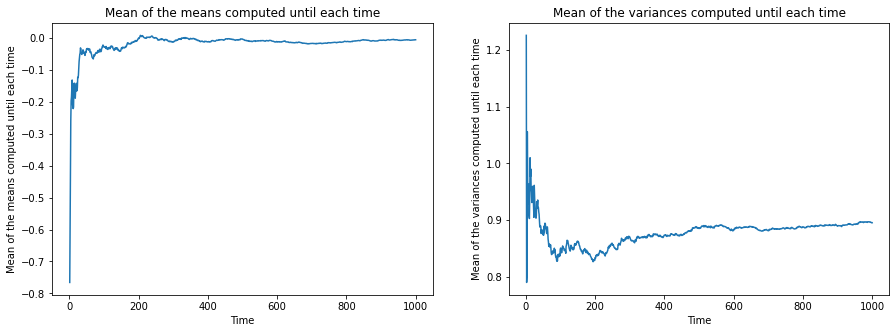

In [10]:
### Defining the figure and axis.
figure, axis = plt.subplots(1, 2, figsize=(15,5))

#########################
### FIRST PLOT ###
axis[0].plot(times, means_cumsum_mean)
axis[0].set_title('Mean of the means computed until each time')
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Mean of the means computed until each time')
#axis[0].set_ylim(-0.1, 2)

#########################
### SECOND PLOT ###
axis[1].plot(times, variances_cumsum_mean)
axis[1].set_title('Mean of the variances computed until each time')
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Mean of the variances computed until each time')
#axis[1].set_ylim(-0.1, 2)

plt.show()

In [11]:
### Printing the last computed means.
print("Last mean of the means (t=1000) = "+str(means_cumsum_mean[999]))
print("Last mean of the variances (t=1000) = "+str(variances_cumsum_mean[999]))

Last mean of the means (t=1000) = -0.004769052375312163
Last mean of the variances (t=1000) = 0.8951543331021059


So, as it is possible to see, both the mean of the means and the mean of the variances approach the expected values of 0 and 1, but the mean of the means is closer to the expected value than the mean of the variances at the end.